
# EDA профилей пользователей


In [1]:
import json
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!pip install --upgrade pyarrow
!pip install fastparquet



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [3]:
DATA_DIR = Path('..') / 'data'
USER_PATH = DATA_DIR / 'users.pq'
REGION_PATH = DATA_DIR / 'support' / 'region.json'

users_df = pd.read_parquet(USER_PATH, engine='fastparquet')
users_df.head()


,user_id,socdem_cluster,region
0,0,19.0,21.0
1,1,7.0,2.0
2,3,19.0,59.0
3,7,0.0,2.0
4,8,20.0,63.0


In [4]:
with open(REGION_PATH) as f:
    region_mapping = {str(k): v for k, v in json.load(f).items()}

In [5]:
def normalize_region_code(value):
    if pd.isna(value):
        return None
    try:
        return str(int(value))
    except (ValueError, TypeError):
        return str(value)

users_df['region_code_norm'] = users_df['region'].apply(normalize_region_code)
users_df['region_name'] = users_df['region_code_norm'].map(region_mapping)

unmapped = users_df['region_name'].isna().sum()
print(f'Всего пользователей: {len(users_df)}')
print(f'Сопоставлено регионов: {len(users_df) - unmapped}')
print(f'Отсутствуют в маппинге: {unmapped}')

Всего пользователей: 43997878
Сопоставлено регионов: 43258144
Отсутствуют в маппинге: 739734


In [6]:
top_n = 30
region_counts = users_df['region_name'].fillna('Не определен').value_counts()
top_regions = region_counts.head(top_n)

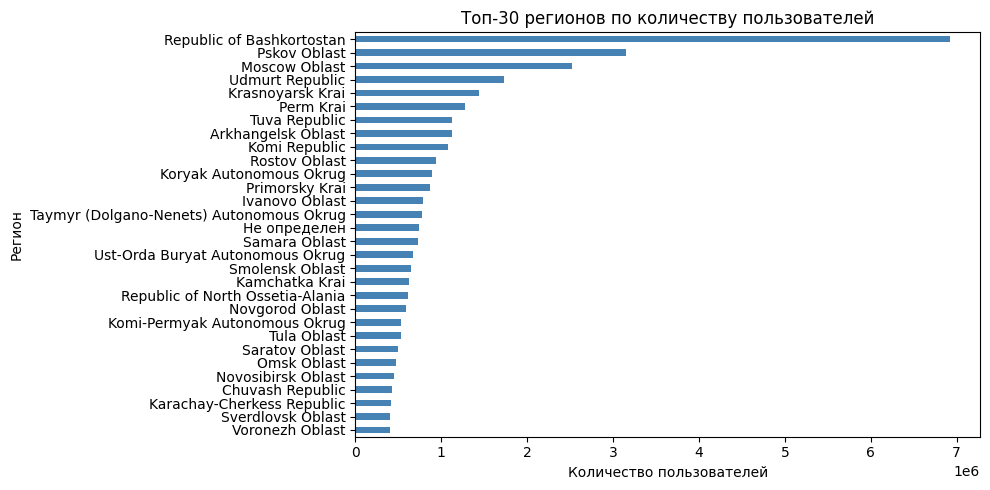

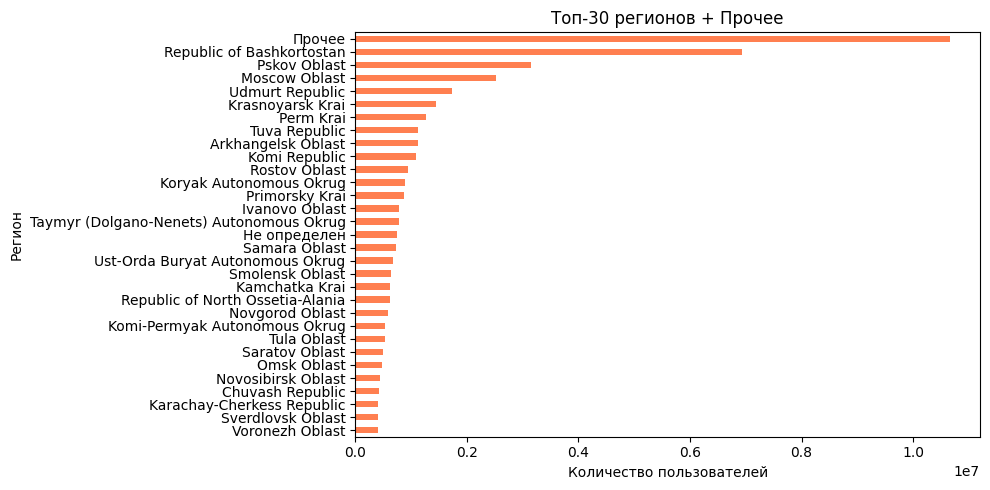

In [7]:
plt.figure(figsize=(10, 5))
top_regions.sort_values().plot(kind='barh', color='steelblue')
plt.title(f'Топ-{top_n} регионов по количеству пользователей')
plt.xlabel('Количество пользователей')
plt.ylabel('Регион')
plt.tight_layout()
plt.show()

other_count = region_counts.iloc[top_n:].sum()
if other_count:
    region_counts_with_other = pd.concat([top_regions, pd.Series({'Прочее': other_count})])
    plt.figure(figsize=(10, 5))
    region_counts_with_other.sort_values().plot(kind='barh', color='coral')
    plt.title(f'Топ-{top_n} регионов + Прочее')
    plt.xlabel('Количество пользователей')
    plt.ylabel('Регион')
    plt.tight_layout()
    plt.show()


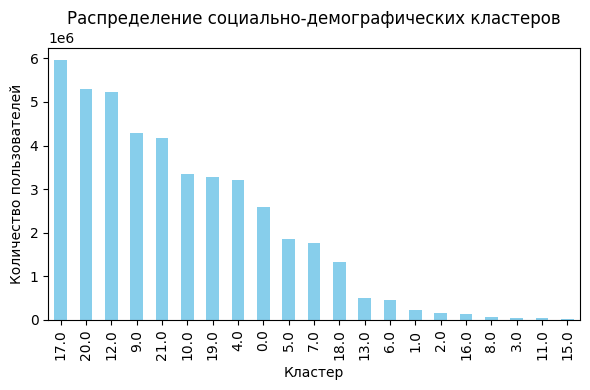

In [8]:
cluster_counts = users_df['socdem_cluster'].value_counts()

plt.figure(figsize=(6, 4))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение социально‑демографических кластеров')
plt.xlabel('Кластер')
plt.ylabel('Количество пользователей')
plt.tight_layout()
plt.show()
